# Example 1

In [ ]:
from rkmethod import *

A = np.array([[0, 0, 0], [0.5, 0, 0], [2, -1, 0]])
b = np.array([1/6, 2/3, 1/6])
c = np.array([0, 0.5, 1])

rkm = RKMethod(A, b, c)
rkm.meta_data()

# Example 2

RK method (RK method) meta data:
A:
[[0.         0.         0.         0.        ]
 [0.66666667 0.         0.         0.        ]
 [0.         0.66666667 0.         0.        ]
 [0.25       0.         0.75       0.        ]]
b: [0.25 0.   0.75 0.  ]
c: [0.         0.66666667 0.66666667 1.        ]

The method is explicit.

Number of stages: 4

Maximum possible order of consistency: 4

Order of consistency: 2

Stability function in the form P/Q:

P:

        3       2
0.3333 x + 0.5 x + 1 x + 1
Q:

 
1


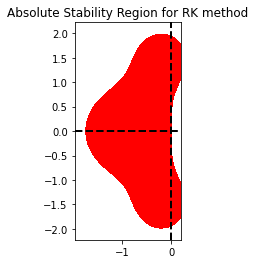

In [20]:
from rkmethod import *

A = np.array([[0, 0, 0, 0], [2/3, 0, 0, 0], [0, 2/3, 0, 0], [1/4, 0, 3/4, 0]])
b = np.array([1/4, 0, 3/4, 0])
c = np.array([0, 2/3, 2/3, 1])

rkm = RKMethod(A, b, c)

rkm.meta_data()

## Problem

\begin{align}
S'(t) &= - \frac{\beta S(t) I(t)}{N}\\
E'(t) &= \frac{\beta S(t) I(t)}{N} - \alpha E(t)\\
I'(t) &= \alpha E(t) - \gamma I(t)\\
R'(t) &= \gamma I(t)
\end{align}

a)

In [21]:
N = 9.9 * 10**6
alpha = 1/4
beta = 1/2
gamma = 1/3

def f(t, y):
    S, E, I, R = y
    return np.array([-beta * S * I / N, 
                     beta * S * I / N - alpha * E,
                     alpha * E - gamma * I,
                     gamma * I])

Text(0, 0.5, 'Num of people')

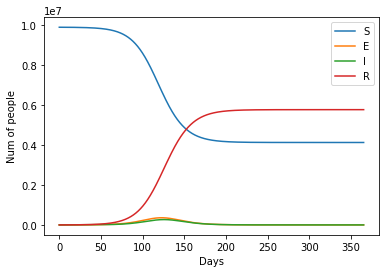

In [22]:
y_0 = [9.9 * 10**6, 1000, 0, 1]
t_0 = 0
t_f = 365
Steps = 2**14

result = rkm.solver(f, y_0, t_0, t_f, Steps)

result_S = result.y[:, 0]
result_E = result.y[:, 1]
result_I = result.y[:, 2]
result_R = result.y[:, 3]
grid = result.grid

import matplotlib.pyplot as plt

plt.plot(grid, result_S, grid, result_E, grid, result_I, grid, result_R)
plt.legend(['S', 'E', 'I', 'R'])
plt.xlabel('Days')
plt.ylabel('Num of people')

b)

In [32]:
result_ord = rkm.order_from_fine_grid(f, y_0, t_0, t_f, [2**8, 2**9, 2**10], 2**16)

ord_S = result_ord[:, 0]
ord_E = result_ord[:, 1]
ord_I = result_ord[:, 2]
ord_R = result_ord[:, 3]

print(f'S order: {ord_S}')
print(f'E order: {ord_E}')
print(f'I order: {ord_I}')
print(f'R order: {ord_R}')

print('Corase grid 1:')
result_ord = rkm.order_from_coarse_grid_1(f, y_0, t_0, t_f, 2**12)
print(result_ord)
print('Corase grid 2:')
result_ord = rkm.order_from_coarse_grid_2(f, y_0, t_0, t_f, 2**12)
print(result_ord)

S order: [1.92058158 1.96137898]
E order: [1.92713441 1.9649818 ]
I order: [1.91130421 1.95579354]
R order: [1.91867423 1.96025195]
Corase grid 1:
[1.99439385 1.99488458 1.99363643 1.99423935]
Corase grid 2:
[1.99439385 1.99488458 1.99363643 1.99423932]


c)

In [33]:
print(f'Approximate number of E after half a year: {result_E[2**13]}')

Approximate number of E after half a year: 36029.029736332675
